MNIST with NN

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import os

In [2]:
EPOCH = 5
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [3]:
if not(os.path.exists('./data')) or not os.listdir('./data'):
    # not mnist dir or mnist is empyt dir
    DOWNLOAD_MNIST = True
DOWNLOAD_MNIST

False

In [4]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

In [5]:
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [6]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)
for X, y in test_loader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([50, 1, 28, 28])
Shape of y:  torch.Size([50]) torch.int64


In [7]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_feature, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        ) 
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
net = Net(28*28, 512, 10)

In [9]:
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(net.parameters(), lr=LR)

In [11]:
def train(dataloader, model, loss_fn, optim):
    size = len(dataloader.dataset)
    model.train()
    for step, (x,y) in enumerate(dataloader):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 100 == 0:
            print(x.dtype)
            loss, current = loss.item(), step * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        

In [12]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [13]:
for i in range(EPOCH):
    print(f'EPOCH {i+1}')
    train(train_loader, net, loss_fn, optim)
    test(test_loader, net, loss_fn)

EPOCH 1
torch.float32
loss: 2.307951  [    0/60000]
torch.float32
loss: 2.292087  [ 5000/60000]
torch.float32
loss: 2.291622  [10000/60000]
torch.float32
loss: 2.287766  [15000/60000]
torch.float32
loss: 2.293760  [20000/60000]
torch.float32
loss: 2.276606  [25000/60000]
torch.float32
loss: 2.274204  [30000/60000]
torch.float32
loss: 2.271068  [35000/60000]
torch.float32
loss: 2.255443  [40000/60000]
torch.float32
loss: 2.259116  [45000/60000]
torch.float32
loss: 2.266231  [50000/60000]
torch.float32
loss: 2.233307  [55000/60000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 2.238166 

EPOCH 2
torch.float32
loss: 2.247168  [    0/60000]
torch.float32
loss: 2.220244  [ 5000/60000]
torch.float32
loss: 2.216748  [10000/60000]
torch.float32
loss: 2.209617  [15000/60000]
torch.float32
loss: 2.241406  [20000/60000]
torch.float32
loss: 2.191886  [25000/60000]
torch.float32
loss: 2.202167  [30000/60000]
torch.float32
loss: 2.188353  [35000/60000]
torch.float32
loss: 2.159608  [40000/60000]
torch.fl

tensor(7) 7


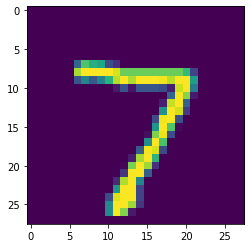

In [38]:
testx, testy = test_data[0][0], test_data[0][1]
np_testx = testx[0].numpy()
plt.imshow(np_testx)
test_pred_y = net(testx)
argmax_pred_y = torch.argmax(test_pred_y)
print(argmax_pred_y, testy)